In [3]:
import cv2
import numpy as np
from PIL import Image, ImageDraw
import os
import warnings
import string
from skimage.filters import threshold_otsu
from scipy import signal, ndimage
from skimage.feature import hog


def ncc(target, template):#I used the NCC algorithm that I used previous assignment
    
    #Converting array part
    targetArr=np.array(target)
    templateArr=np.array(template)
 
    #Converting mean and standart deviation part for target
    targetMean=targetArr.mean()
    targetStd=targetArr.std()
    
    #Converting mean and standart deviation part for template
    templateMean=templateArr.mean()
    templateStd=templateArr.std()

    # I subtracted the mean and divided by the standard deviation
    templateNorm=(targetArr-targetMean)/targetStd
    targetNorm=(templateArr-templateMean)/templateStd

    return (templateNorm * targetNorm).sum() / (templateNorm.size)



def classification(letter,target_image,pixel):
    global trueResults, allResults #Values for computing accuracy
    templates=[] #I defined this list to hold all ncc value
    
    for k in string.ascii_uppercase:
        template_image=cv2.imread('dataset/template/'+k+ '.png')#Reading data part 
        template_image = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)#Converting image to gray part

        #Computing histogram of oriented gradients
        fd, template_image = hog(template_image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
        maxPieceCorr=0 #Maximum value that after traversing the photo part by part.
        #The part where pixel-by-pixel navigation takes place in the target value
        for i in range(0,int(target_image.shape[0]-template_image.shape[0]),pixel):
            for j in range(0,int(target_image.shape[1]-template_image.shape[1]),pixel): 
                temp=ncc(target_image[i:i+template_image.shape[0],j:j+template_image.shape[1]],template_image)
                #The place where the ncc values found in each circulated piece are compared and the largest one is taken
                if(temp>maxPieceCorr):
                    maxPieceCorr=temp

        templates.append(maxPieceCorr) #I added the ncc value of each letter to a list
            
    peak_signal=np.max(templates) #I defined the maximum ncc value as the peak value
    peak_index=templates.index(peak_signal)#I found the letter of the peak value found
    
    if(letter==string.ascii_uppercase[peak_index]):#Computing accuracy part
        trueResults+=1
    allResults+=1 
    #print("Desired val: "+letter+" Result: "+string.ascii_uppercase[peak_index])

#I defined a list of names to read all target images.
names=[1,101,201,301,401,501,601,701,801,901,1001,1101,1201,1301,1401,1501,1601,1701,1801,1901,2001,2101,2201,2301,2401,2501,2601,2701,2801,2901]
trueResults=0
allResults=0

for i in string.ascii_uppercase: 
    for j in names:
        j = str(j)
        target_image=cv2.imread('dataset/target/'+i+'/'+i+j+'.jpg')#Reading data part 
        target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)#Converting image to gray part
        #Computing histogram of oriented gradients
        fd, hog_image = hog(target_image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
        classification(i,hog_image,3)
        

print("Accuracy is: %"+str((trueResults/allResults)*100)+"in 3 pixel wandering")



Accuracy is: %13.461538461538462in 3 pixel wandering


In [7]:
trueResults=0
allResults=0

for i in string.ascii_uppercase:
    for j in names:
        j = str(j)
        target_image=cv2.imread('dataset/target/'+i+'/'+i+j+'.jpg')#Reading data part 
        target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)#Converting image to gray part
        #Computing histogram of oriented gradients
        fd, hog_image = hog(target_image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
        classification(i,hog_image,1)

print("Accuracy is: %"+str((trueResults/allResults)*100)+"in 1 pixel wandering")

Accuracy is: %15.897435897435896in 1 pixel wandering


In [19]:
def binaryClassification(letter,target_image,pixel): #I defined a separate classification method for converting to binary image.
    warnings.filterwarnings('ignore')
    global trueResults, allResults #Values for computing accuracy
    templates=[] #I defined this list to hold all ncc value
    
    for k in string.ascii_uppercase:
        template_image=cv2.imread('dataset/template/'+k+ '.png')#Reading data part 
        template_image = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)#Converting image to gray part
        ret,binary = cv2.threshold(template_image,50,255,0)#Binary converting part with threshold
        #Computing histogram of oriented gradients
        fd, template_image = hog(binary, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
        maxPieceCorr=0 #Maximum value that after traversing the photo part by part.
        for i in range(0,int(target_image.shape[0]-template_image.shape[0]),pixel):
            for j in range(0,int(target_image.shape[1]-template_image.shape[1]),pixel): 
                temp=ncc(target_image[i:i+template_image.shape[0],j:j+template_image.shape[1]],template_image)
                #The place where the ncc values found in each circulated piece are compared and the largest one is taken  
                if(temp>maxPieceCorr):
                    maxPieceCorr=temp

        templates.append(maxPieceCorr)#I added the ncc value of each letter to a list
            
    peak_signal=np.max(templates)#I defined the maximum ncc value as the peak value
    peak_index=templates.index(peak_signal)#I found the letter of the peak value found
    
    if(letter==string.ascii_uppercase[peak_index]):#Computing accuracy part
        trueResults+=1
    allResults+=1 
    #print("Desired val: "+letter+" Result: "+string.ascii_uppercase[peak_index])


trueResults=0
allResults=0

for i in string.ascii_uppercase:
    for j in names:
        j = str(j)
        target_image=cv2.imread('dataset/target/'+i+'/'+i+j+'.jpg')#Reading data part 
        target_image = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)#Converting image to gray part
        ret,binary = cv2.threshold(target_image,50,255,0)#Binary converting part with threshold
        #Computing histogram of oriented gradients
        fd, hog_image = hog(binary, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
        binaryClassification(i,hog_image,3)

print("Accuracy is: %"+str((trueResults/allResults)*100)+"in 3 pixel wandering with converting binary")

Accuracy is: %7.435897435897436in 3 pixel wandering with converting binary


****************************
Desired val: A Result val: A

Target Value A501:


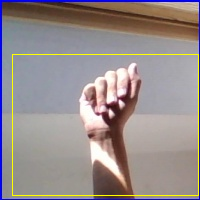

Template Value A:


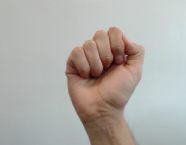

****************************
Desired val: C Result val: C

Target Value C401:


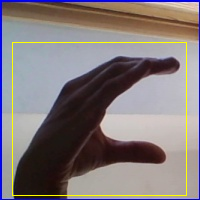

Template Value C:


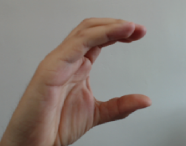

****************************
Desired val: E Result val: E

Target Value E1:


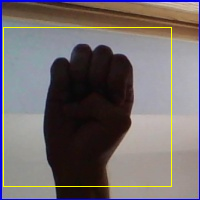

Template Value E:


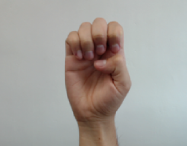

****************************
Desired val: G Result val: G

Target Value G2601:


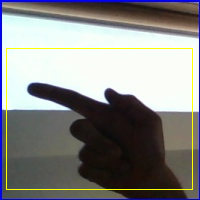

Template Value G:


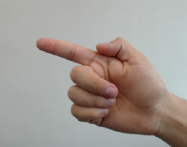

****************************
Desired val: I Result val: I

Target Value I1001:


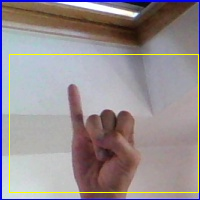

Template Value I:


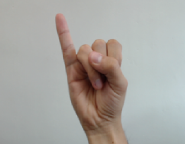

In [20]:
def offset(targetName,target_image):#The method I use for the desired 5 off-set images
    templates=[]#I defined this list to hold all ncc value
    letterVals = {} #I defined a library to store the part with the highest ncc value
    for k in string.ascii_uppercase:
            template_image = cv2.imread('dataset/template/'+k+ '.png')#Reading data part 
            maxPieceCorr=0
            for i in range(0,int(target_image.shape[0]-template_image.shape[0]),3):
                for j in range(0,int(target_image.shape[1]-template_image.shape[1]),3): 
                    temp = ncc(target_image[i:i+template_image.shape[0],j:j+template_image.shape[1]],template_image)
                    if(temp>maxPieceCorr):
                        maxPieceCorr=temp
                        letterVals[k] = str(i)+"-"+str(j) #I combined the x and y axis using "-"
                        
            templates.append(maxPieceCorr)#I added the ncc value of each letter to a list
    
    peak_signal = np.max(templates)#I defined the maximum ncc value as the peak value
    peak_index= templates.index(peak_signal)#I found the letter of the peak value found
    
    values=letterVals[string.ascii_uppercase[peak_index]]#I got the index of the part with the highest ncc value
    parts = values.split('-') #I splitted the x and y axis from "-"
    maxVal1=int(parts[0]) #X axis part
    maxVal2=int(parts[1]) #Y axis part
    
    drawTarget = Image.fromarray(target_image[:,:,::-1])
    draw = ImageDraw.Draw(drawTarget)
    region = (maxVal1+template_image.shape[0], maxVal1, maxVal2, maxVal2+template_image.shape[1])

    draw.rectangle(region, outline='yellow') #I defined most correlated offsets in a region with yellow rows

    print("****************************") #Output displaying part
    print("Desired val: "+targetName[0]+" Result val: "+string.ascii_uppercase[peak_index]) 
    print("\nTarget Value "+targetName+":")
    display(drawTarget)
    print("Template Value "+string.ascii_uppercase[peak_index]+":")
    im = cv2.imread('dataset/template/'+string.ascii_uppercase[peak_index]+ '.png')
    im = Image.fromarray(im[:,:,::-1])
    display(im)

#Five offset output as desired in PDF 
target_image = cv2.imread('dataset/target/A/A501.jpg')
offset("A501",target_image)

target_image = cv2.imread('dataset/target/C/C401.jpg')
offset("C401",target_image)

target_image = cv2.imread('dataset/target/E/E1.jpg')
offset("E1",target_image)

target_image = cv2.imread('dataset/target/G/G2601.jpg')
offset("G2601",target_image)

target_image = cv2.imread('dataset/target/I/I1001.jpg')
offset("I1001",target_image)
